<img src="images/usm.png" width="480" height="240" align="left"/>

# MAT281 - 2° Semestre 2019
## Aplicaciones de la Matemática en la Ingeniería


EL siguiente laboratorio debe realizarse de manera individual. No es posible copiar y pegar código de otros estudiantes. 
Pueden consultar internet (stackoverflow, por ejemplo), pero deben indicar sus fuentes cuando corresponda.

**Nombre**: *Juan Fco. Briceño Figueroa*

**Rol**: *201510522-7*


## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.


## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://images-na.ssl-images-amazon.com/images/I/717VaRblQCL._UX679_.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `serie_poleras.csv` y consta de las ventas de poleras durante los años del 2016 al 2019. 

El objetivo es predecir el precio de la polera basados en el número de ventas que se obtiene.


Primero es necesario definir la [elasticidad](https://en.wikipedia.org/wiki/Elasticity_(economics)) (en el sentido económico). La **elasticidad demanda-precio** o simplemente **elasticidad de la demanda**, mide la variación relativa o porcentual que experimenta la cantidad demandada como consecuencia de una variación en el precio de un uno por ciento, en otras palabras mide la intensidad con la que responden los compradores a una variación en el precio.


- Cuando la reducción del precio (P) hace que la cantidad demandada (Q) aumente tanto que la multiplicación de (P * Q) sea mayor a la original, se presenta una demanda elástica.E>1
- Cuando la reducción del precio (P) hace que la cantidad demandada (Q) aumente en proporciones iguales y (P * Q) sea igual, la elasticidad es proporcional o igual a 1.
- Cuando la reducción del precio (P) hace que la cantidad demandada (Q) aumente muy poco o nada que la multiplicación de (P * Q) es menor a la original, se afirma que la demanda de un bien es inelástica o rígida. E<1

Este concepto será clave para realizar una correcta predición en los resultados. Ahora, a modo de ayuda, analicemos los datos.

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.model_selection

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","serie_poleras.csv"), sep=",")

df = df[['FECHA_LUNES',
        'VENTA',
        'PRECIO',
         'STOCK',
         'NAVIDAD',
         'VERANO',
        'PRIMAVERA']]

df['FECHA_LUNES'] = pd.to_datetime(df['FECHA_LUNES'])
df.head()

,FECHA_LUNES,VENTA,PRECIO,STOCK,NAVIDAD,VERANO,PRIMAVERA
0,2016-11-28,4031,482.629433,218477.00,0,1,1
1,2016-12-05,8236,496.487690,209313.00,0,1,1
2,2016-12-12,11798,490.107492,225950.00,0,1,1
3,2016-12-19,15749,527.144433,155811.00,1,1,1
4,2016-12-26,5838,476.613886,139957.99,0,1,1


In [3]:
df["FECHA_LUNES"].max()

Timestamp('2019-08-26 00:00:00')

Le presentamos dos graficos de interés.

### a) Precio vs ventas

Dado que se quiere predecir el precio basado en las ventas de poleras, es necesario analizar la relación que existe entre ambos mediante un gráfico.

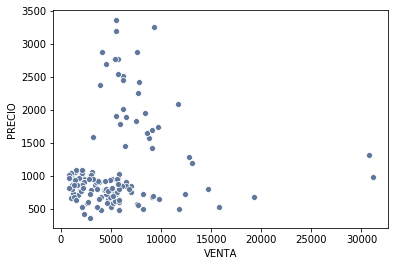

In [4]:
# parametros esteticos de seaborn
sns.scatterplot(x='VENTA',
           y='PRECIO',
           data=df)
plt.show()

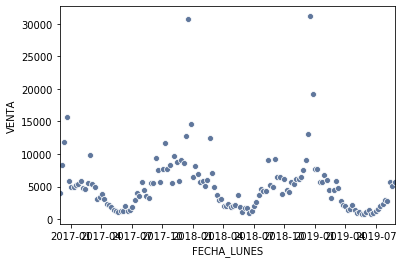

In [14]:
# parametros esteticos de seaborn

ax = sns.scatterplot(x='FECHA_LUNES',
           y='VENTA',
           data=df)

ax.set_xlim(df['FECHA_LUNES'].min(), df['FECHA_LUNES'].max())
plt.show()

Basado en la información presentada responda las siguientes preguntas:

1. ¿ Cómo debería ser la relación entre las poleras (elásticidad)?, ¿ Cómo es en realidad la elasticidad ?.
2.  ¿ Cuáles son las variables claves en el problema ?, ¿ Se necesitan más variables ?.
3. ¿ Es necesario separar por fechas ?, en caso afirmativo, separe el conjunto de datos según su criterio.
4. Realice un análisis exploratorio de los datos sobre las variables escogida en el punto 2. Ocupe estos resultados para interpretar de mejor forma el problema.
5. Realice un ajuste de regresión lineal simple. Si es necesario, puede ocupar más de una regresión lineal simple según los casos encontrados. 
6. Realice predicciones de los precios para la venta de 10000,20000 y 30000 poleras.

In [ ]:
#Respuestas
#1.-La relcion entre las poleras deberia ser negativa. Como se vio, si es que el detalle monetario de una polera incrementara en invierno es completamente
   #improbable que se comple, mas aun, en esta epoca del año es cuando se producen las ventas masivas conocidas como ventas de bodega o remate de stock por parte de las 
   #distribuidoras, donde se alcanzan descuentos que pueden llegar al 80%. Por otro lado, si es que se aumentaran los precios en epoca navideña o en la temporada de primavera
   #verano la elasticidad seria menor , dado que usualmente las empresas tratan de vender la mayor cantidad a un precio alto, puesto que la gente 'necesitaria'
   #solo comprarla. Pese a esto, la elasticidad nos dio positiva porque se estuvo analizando el conjunto completo de datos.

#2.-Las fechas, las ventas y los precios , son las variables importantes para este problema.

#3.-En base a lo ya tratado,la idea principal era dividir en 3 conjuntos de datos (temporada , navidad y no navidad). En vista de que pueden existir errores en los datos ingresados, lo mejor sera
   #tomar la base de datos y subdividirlas en base a las fechas entregadas por el conjunto. El criterio que utilizaria para ''navidad'' seria desde una semana antes del 24 de diciembre
   #Desde este punto se empezaria a trabajar.
#4.- Como el conjunto de datos es pequeño y acotado (145 datos alrededor) fue posible evidencia de manera practica que no existian puntos Null y los datos ya estaban ingresados de una manera estandar.

#En los siguientes apartados veremos los pasos a seguir para solucionar de una forma adecuada los problemas 4 y 5

In [6]:
#Aqui podremos ver una tabla que nos resuma las entradas y de la cual pudimos sacar la base de nuestro analisis anterior.
def resumen_por_columna(dfe,cols):
    pd_series = dfe[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    dfe_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return dfe_info

frames = []

for col in df.columns:
    aux_dfs = resumen_por_columna(df,col)
    frames.append(aux_dfs)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info

,columna,unicos,vacios
0,FECHA_LUNES,144,0
1,VENTA,141,0
2,PRECIO,144,0
3,STOCK,144,0
4,NAVIDAD,3,0
5,VERANO,2,0
6,PRIMAVERA,2,0


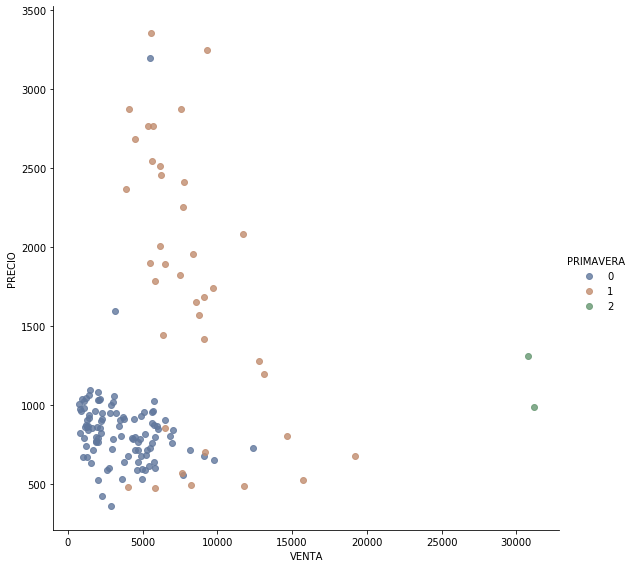

In [7]:
# grafico de los puntos anteriormente mencionados


df.loc[df['NAVIDAD']==2,'PRIMAVERA']=2

# grafico de puntos de una manera colorida
sns.lmplot(x='VENTA',
           y='PRECIO',
           data=df,
           height=8,
           fit_reg=False, # no ajustar regresion
           hue='PRIMAVERA')   # color por Generation

In [15]:
#En esta parte iniciaremos con la regresion lineal pedida por el problema 4 y 5

X = df[['VENTA']]
Y = df['PRECIO']

# split dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

In [24]:
# regresion lineal sin intercepto
model_1 = linear_model.LinearRegression(fit_intercept = False)
model_train_1  = model_1.fit(X_train,Y_train)

print('Modelo sin intercepto')
print('coeficientes: ',model_train_1.coef_)
print('intercepto: ',model_train_1.intercept_)

Modelo sin intercepto
coeficientes:  [0.1350911]
intercepto:  0.0


In [25]:
#  con intercepto
model_2 = linear_model.LinearRegression()
model_train_2  = model_2.fit(X_train,Y_train)
print('Modelo con intercepto')
print('coeficientes: ',model_train_2.coef_)
print('intercepto: ',model_train_2.intercept_)

Modelo con intercepto
coeficientes:  [0.02523904]
intercepto:  962.9284090414241


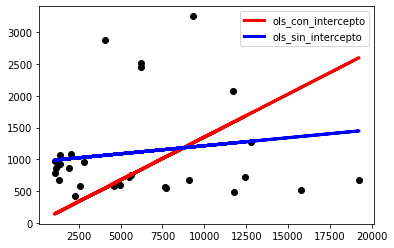

In [18]:
#grafico de las tendencias lineales o rectas de tendencias de los datos por colores
Y_predict_1 = model_train_1.predict(X_test)

Y_predict_2 = model_train_2.predict(X_test)


plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_predict_1, color='red', linewidth=3, label='ols_con_intercepto') #regresion lineal con intercepto
plt.plot(X_test, Y_predict_2, color='blue', linewidth=3, label='ols_sin_intercepto') #regresion lineal sin intercepto
plt.legend(loc='upper right')

#Gracias a esta grafica podemos ver que las rectas no seran representativas y nuestra prediccion puede estar errada

In [22]:
#En este apartado obtendremos las predicciones pedidas por el problema, utilizando la recta predictoria con intercepto
lista=[10000, 20000, 30000]
Y=model_train_2.predict(pd.DataFrame(lista))
print(Y)

[1215.31879274 1467.70917645 1720.09956015]


### Referencias

* [A beginner’s guide to Linear Regression in Python with Scikit-Learn](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)
